# A simple demo of the package

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import warnings

from sparseRRR import elastic_rrr, elastic_rrr_bootstrap, elastic_rrr_cv, dimensionality, bibiplot, plot_cv_results 
from sklearn.exceptions import ConvergenceWarning

In [3]:
def preprocess(data):
    X = data['counts'][:,data['mostVariableGenes']] / np.sum(data['counts'], axis=1) * 1e+6
    X = X.toarray()
    X = np.log2(X + 1)
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    Y = data['ephys']
    Y = Y - np.mean(Y, axis=0)
    Y = Y / np.std(Y, axis=0)
    
    return (X,Y)

In [4]:
data = pickle.load(open('data/scala2020.pickle', 'rb'))

X,Y = preprocess(data)
genes = data['genes'][data['mostVariableGenes']]

print('Shape of X:', X.shape, '\nShape of Y:', Y.shape)

Shape of X: (1213, 1000) 
Shape of Y: (1213, 16)


/var/folders/j9/6j6_y95j0tl4lmss_d5lyv3w0000gn/T/ipykernel_11656/4115969558.py:1: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(open('data/scala2020.pickle', 'rb'))


In [5]:
w,v = elastic_rrr(X, Y, rank=2, alpha=.28, l1_ratio=1)

print('\nGenes selected: {}'.format(np.sum(w[:,0]!=0)))
print(', '.join(genes[w[:,0]!=0]))


Genes selected: 25
Arpp21, Atp1a3, Bcan, Bdnf, Cacna1e, Cacna2d1, Coro6, Erbb4, Gad1, Kcnc2, Kcnv1, Lamp5, Mybpc1, Npy1r, Nxph1, Pcsk2, Plch2, Ptk2b, Pvalb, Slc17a7, Slc6a1, Snca, Tac1, Tafa1, Tmem44


Text(0.5, 1.0, 'Sorted row l2-norms of $W$')

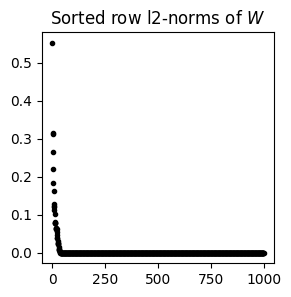

In [6]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(np.sort(np.linalg.norm(w, axis=1))[::-1], '.', color='black')
ax.set_title(r'Sorted row l2-norms of $W$')

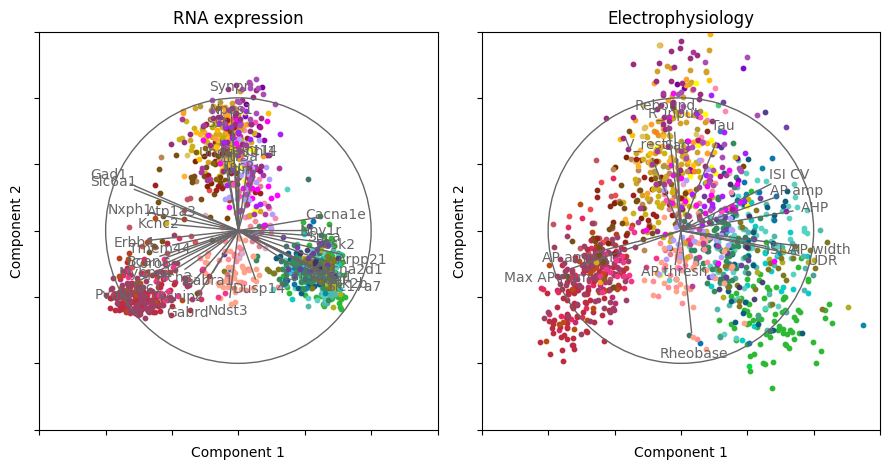

In [7]:
bibiplot(X, Y, w, v, 
         titles = ['RNA expression', 'Electrophysiology'],
         cellTypes = data['ttype'], 
         cellTypeColors = data['colors'], 
         YdimsNames = data['ephysNames'], 
         XdimsNames = genes
         )

In [64]:
alphas = np.arange(.2,1.01,.1)
l1_ratios = np.array([.75, 1])

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    cvResults = elastic_rrr_cv(X, Y, l1_ratios=l1_ratios, alphas=alphas)


1.......... Time: 0.0h 25m 15s


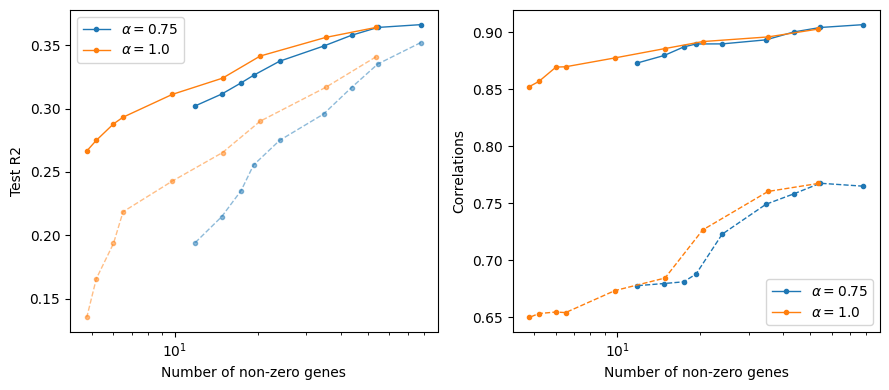

In [65]:
plot_cv_results(*cvResults, l1_ratios)

In [67]:
bootCounts = elastic_rrr_bootstrap(X, Y, alpha=.4, l1_ratio=1)

args = np.argsort(bootCounts)[::-1]
print('')
for i in range(20):
    print('{:10} {:.2f}'.format(genes[args[i]], bootCounts[args[i]]))

.................................................................................................... 

Cacna2d1   1.00
Gad1       1.00
Pvalb      0.99
Arpp21     0.99
Slc6a1     0.95
Erbb4      0.94
Nxph1      0.88
Coro6      0.86
Mybpc1     0.78
Ptk2b      0.77
Tac1       0.77
Bcan       0.71
Cacna1e    0.65
Slc17a7    0.38
Snca       0.38
Bdnf       0.30
Baiap2     0.27
Tafa1      0.27
Plch2      0.24
Sv2b       0.24


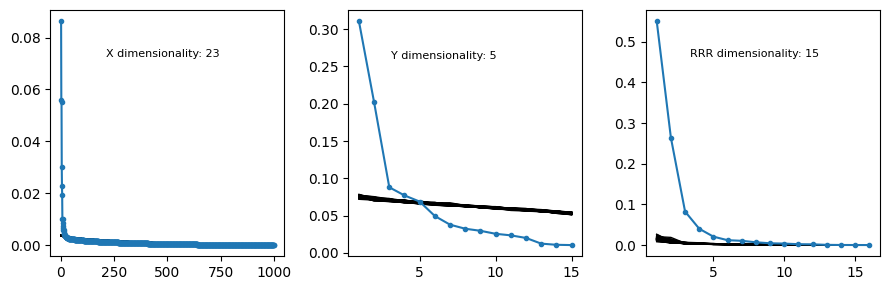

In [75]:
# A quick and dirty way to estimate the dimensionality
dimensionality(X, Y)